## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





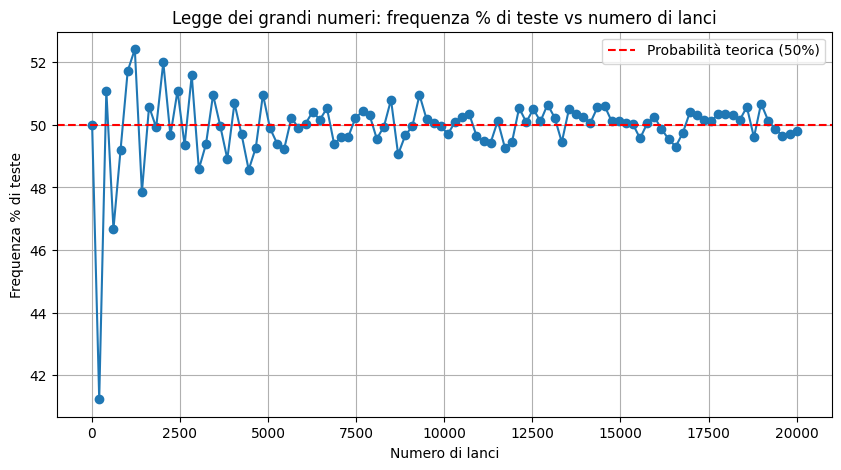

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#lancio moneta 1: testa 0:croce e percentuale teste
def frequenza_teste(N):

    lanci=np.random.choice([0,1], size=N)
    return lanci.mean() * 100

#frequenza grandezze campione
campioni=np.linspace(10,20000,100,dtype=int)
frequenze=[frequenza_teste(N) for N in campioni]

#plot
plt.figure(figsize=(10,5))
plt.plot(campioni, frequenze, marker='o')
plt.axhline(50, color='red', linestyle='--', label='Probabilità teorica (50%)')
plt.xlabel('Numero di lanci')
plt.ylabel('Frequenza % di teste')
plt.title('Legge dei grandi numeri: frequenza % di teste vs numero di lanci')
plt.legend()
plt.grid(True)

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

Shape (righe,colonne): (891, 12)

Valori mancanti per colonna: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Shape dopo rimozione righe con Age mancante: (714, 12)

righe duplicate: 0

Età media per classe:
 Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


C:\Users\pisci\AppData\Local\Temp\ipykernel_10808\1637146623.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df["Embarked"].mode()[0], inplace=True)


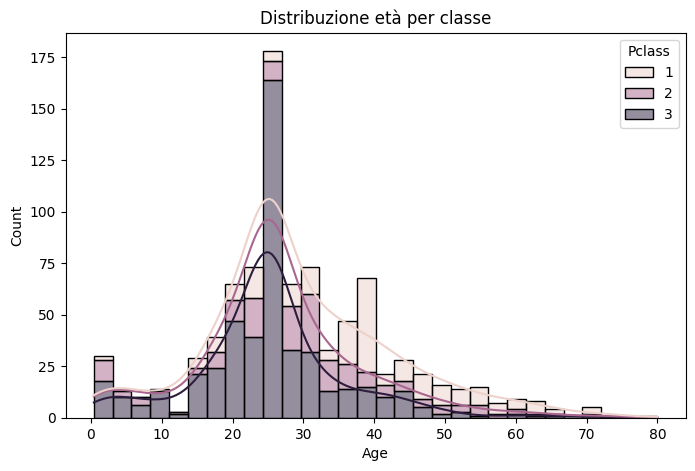

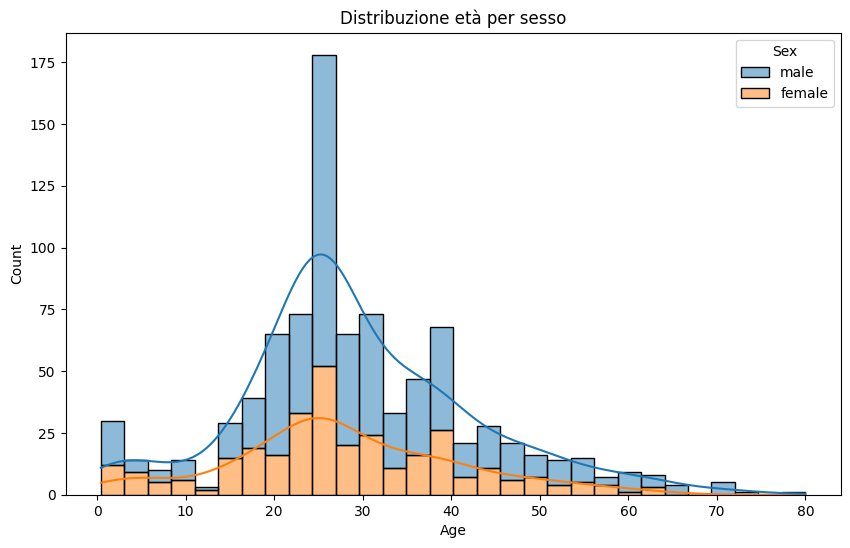

In [4]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

#righe e colonne dataset
print("Shape (righe,colonne):", df.shape)

#controllo valori mancanti per colonna
print("\nValori mancanti per colonna:",df.isnull().sum())

#riempimento colonna embarkerd
df['Embarked'].fillna(df["Embarked"].mode()[0], inplace=True)

#rimozione righe dove age è mancante
df_no_age = df.dropna(subset=['Age'])
print("\nShape dopo rimozione righe con Age mancante:", df_no_age.shape)

#controllo riche duplicate
print("\nrighe duplicate:", df.duplicated().sum())

#calcolo età media passeggeri per ogni classe
df["Age"]=df.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.mean()))
print("\nEtà media per classe:\n", df.groupby("Pclass")["Age"].mean())

#visualizzazione distribuzione eta per classe
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Pclass', bins=30, kde=True, multiple='stack')
plt.title('Distribuzione età per classe')
plt.show()

#visualizzazione distribuzione età per classe e sesso
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Sex', bins=30, kde=True, multiple='stack')
plt.title('Distribuzione età per sesso')
plt.show()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

Distribuzione delle specie:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Lunghezza media petali per specie:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

Larghezza media petali per specie:
species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64


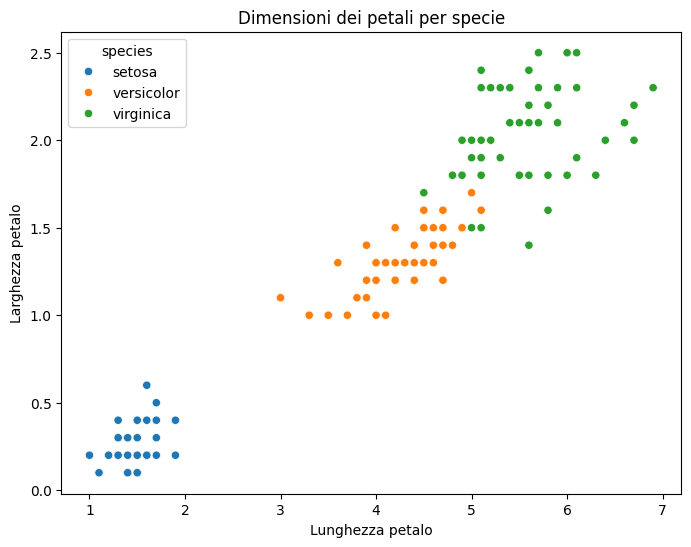


Area media del petalo per specie:
species
setosa         0.3656
versicolor     5.7204
virginica     11.2962
Name: petal_area, dtype: float64


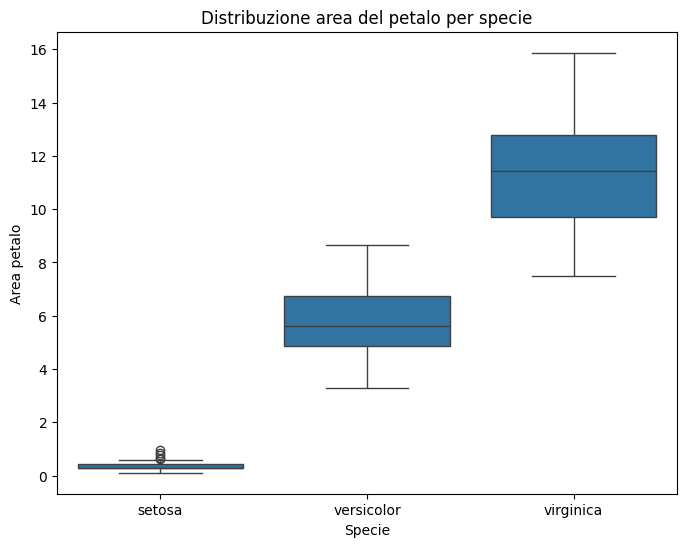

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

#distribuzione delle specie
print("Distribuzione delle specie:")
print(df['species'].value_counts())

#lunghezza e larghezza media dei petali per specie
print("\nLunghezza media petali per specie:")
print(df.groupby('species')['petal_length'].mean())
print("\nLarghezza media petali per specie:")
print(df.groupby('species')['petal_width'].mean())

#visualizzazione dimensioni dei petali per specie (scatterplot)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.title('Dimensioni dei petali per specie')
plt.xlabel('Lunghezza petalo')
plt.ylabel('Larghezza petalo')
plt.show()

#creazione colonna area del petalo e anlisi
df['petal_area'] = df['petal_length'] * df['petal_width']
print("\nArea media del petalo per specie:")
print(df.groupby('species')['petal_area'].mean())

#grafico distribuzione area petalo per specie (boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='species', y='petal_area')
plt.title('Distribuzione area del petalo per specie')
plt.xlabel('Specie')
plt.ylabel('Area petalo')
plt.show()